In [4]:
#internship

import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import os


image_files = r"C:\Users\styap\Downloads\all_data\train\radiology\images"

textdata= pd.read_table('captions.txt')
textdata

,ROCO_00002,Computed tomography scan in axial view showing obliteration of the left maxillary sinus
0,ROCO_00003,Bacterial contamination occurred after comple...
1,ROCO_00004,The patient had residual paralysis of the han...
2,ROCO_00005,Panoramic radiograph after immediate loading.
3,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...
4,ROCO_00008,A 3-year-old child with visual difficulties. ...
...,...,...
65444,ROCO_81819,Initial CT abdomen with contrast showing a di...
65445,ROCO_81820,44-year-old male patient after surgical amput...
65446,ROCO_81821,Primary pulmonary tuberculosis in 18-year-old...
65447,ROCO_81822,"MRI brain with gadolinium, coronal view, show..."


In [12]:
# Load the data and assign column names
textdata = pd.read_table('captions.txt', header=None, names=['Image_ID', 'caption'])
textdata

,Image_ID,caption
0,ROCO_00002,Computed tomography scan in axial view showin...
1,ROCO_00003,Bacterial contamination occurred after comple...
2,ROCO_00004,The patient had residual paralysis of the han...
3,ROCO_00005,Panoramic radiograph after immediate loading.
4,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...
...,...,...
65445,ROCO_81819,Initial CT abdomen with contrast showing a di...
65446,ROCO_81820,44-year-old male patient after surgical amput...
65447,ROCO_81821,Primary pulmonary tuberculosis in 18-year-old...
65448,ROCO_81822,"MRI brain with gadolinium, coronal view, show..."


In [18]:
# Add a new column 'description_length' that stores the length of each description
textdata['description_length'] = textdata['caption'].str.len()

# Display the first few rows to verify the new column
print(textdata.head())

     Image_ID                                            caption  \
0  ROCO_00002   Computed tomography scan in axial view showin...   
1  ROCO_00003   Bacterial contamination occurred after comple...   
2  ROCO_00004   The patient had residual paralysis of the han...   
3  ROCO_00005      Panoramic radiograph after immediate loading.   
4  ROCO_00007   Plain abdomen x-ray: Multiple air levels at t...   

   description_length  
0                  88  
1                 142  
2                 320  
3                  46  
4                 124  


In [22]:
textdata['description_length'].describe()

count    65450.000000
mean       138.963453
std        104.237943
min          3.000000
25%         73.000000
50%        114.000000
75%        175.000000
max       2855.000000
Name: description_length, dtype: float64

In [8]:
import pandas as pd

# Define the file path (use raw string literal for Windows paths)
dlink_url = r'C:\Users\styap\Downloads\all_data\test\non-radiology\dlinks.txt'

# Read the file into a DataFrame
dlink = pd.read_table(dlink_url, header=None, names=['image_id', 'dlink', 'image'])

# Display the DataFrame
print(dlink)


       image_id                                              dlink  \
0    ROCO_81827  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
1    ROCO_81835  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
2    ROCO_81851  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
3    ROCO_81853  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
4    ROCO_81857  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
..          ...                                                ...   
607  ROCO_87910  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
608  ROCO_87912  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
609  ROCO_87919  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
610  ROCO_87932  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
611  ROCO_87951  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   

                                              image  
0                1678-7757-jaos-14-02-0117-gf05.jpg  
1             0036-4665-rimtsp-56-01-00092-gf01.jpg

In [19]:
dlink['dlink'].describe()

count                                                   612
unique                                                  601
top       wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...
freq                                                      2
Name: dlink, dtype: object

In [23]:
import os

# Correct the file path using raw string (r'...')
img = r"C:\Users\styap\Downloads\all_data\test\non-radiology\images"  # Image URL

list1 = []
if os.path.exists(img):
    for file in os.listdir(img):
        list1.append(file)
else:
    print(f"The path {img} does not exist.")

# Print the number of files in the directory
print(len(list1))


610


In [52]:
import os
import pandas as pd

# Define the root data directory (using raw string to handle backslashes)
data_dir = r'C:\Users\styap\Downloads\all_data'

# Initialize an empty list to store the data
data = []

# Iterate through each split (train, test, validation)
for split in ['train', 'test', 'validation']:
    split_dir = os.path.join(data_dir, split)

    # Iterate through each category (radiology, non-radiology)
    for category in ['radiology', 'non-radiology']:
        category_dir = os.path.join(split_dir, category)
        captions_file = os.path.join(category_dir, 'captions.txt')

        # Read captions.txt if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r', encoding='utf-8', errors='ignore') as file:
                # Read each line in the file as a caption
                for line in file:
                    caption = line[12:].strip()
                    id = line[:12]
                    label = 'radiology' if category == 'radiology' else 'non-radiology'
                    # Append the caption, label, and split type to the data list
                    data.append([id, caption, label, split])

# Create a DataFrame with the collected data
data = pd.DataFrame(data, columns=['image_id', 'Caption', 'Label', 'Split'])

# Display the first few rows of the DataFrame
print(data.head())


        image_id                                            Caption  \
0  ROCO_00002\t   Computed tomography scan in axial view showing...   
1  ROCO_00003\t   Bacterial contamination occurred after complet...   
2  ROCO_00004\t   The patient had residual paralysis of the hand...   
3  ROCO_00005\t       Panoramic radiograph after immediate loading.   
4  ROCO_00007\t   Plain abdomen x-ray: Multiple air levels at th...   

       Label  Split  
0  radiology  train  
1  radiology  train  
2  radiology  train  
3  radiology  train  
4  radiology  train  


In [54]:
data.describe()

,image_id,Caption,Label,Split
count,87927,87927,87927,87927
unique,87927,86778,2,3
top,ROCO_00002\t,Preoperative radiograph,radiology,train
freq,1,25,81809,70345


In [56]:
data['Caption'].describe()

count                       87927
unique                      86778
top       Preoperative radiograph
freq                           25
Name: Caption, dtype: object

In [58]:
data['Split'].describe()

count     87927
unique        3
top       train
freq      70345
Name: Split, dtype: object

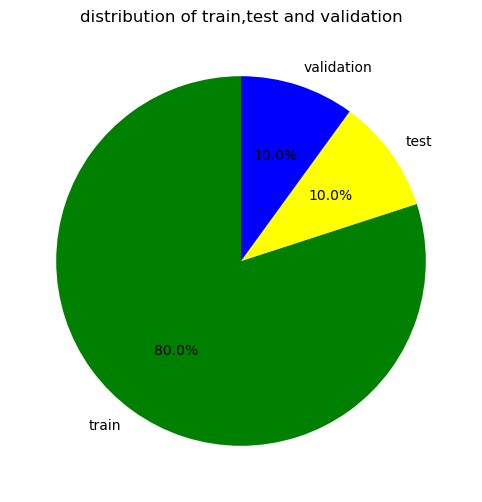

In [60]:
split_counts = data['Split'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%',startangle=90,colors=['green','yellow','blue'])
plt.title('distribution of train,test and validation')
plt.show()

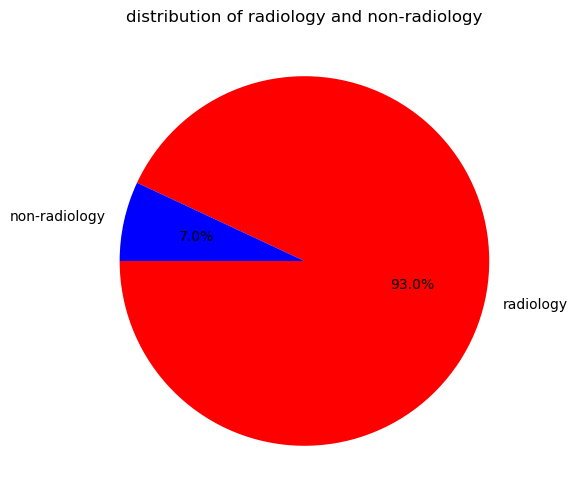

In [62]:
label_counts = data['Label'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',startangle=180,colors=['red','blue'])
plt.title('distribution of radiology and non-radiology')
plt.show()

In [72]:
!pip install opencv-python



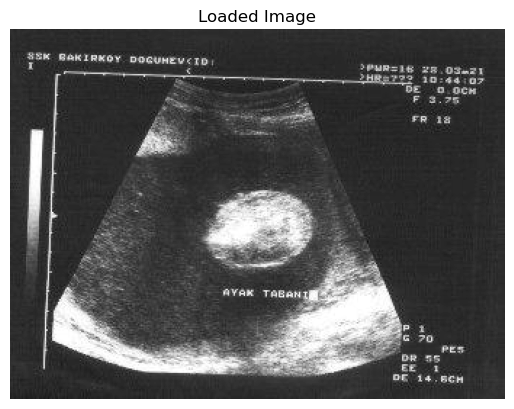

In [73]:
import cv2
import matplotlib.pyplot as plt

# Define the image path (using raw string to handle backslashes)
image_path = r"C:\Users\styap\Downloads\all_data\train\radiology\images\PMC88995_1471-2393-2-1-2.jpg"

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded
if image is None:
    print("Image not found or the path is incorrect.")
else:
    # Display the image using matplotlib
    plt.imshow(image, cmap='gray')
    plt.title('Loaded Image')
    plt.axis('off')
    plt.show()


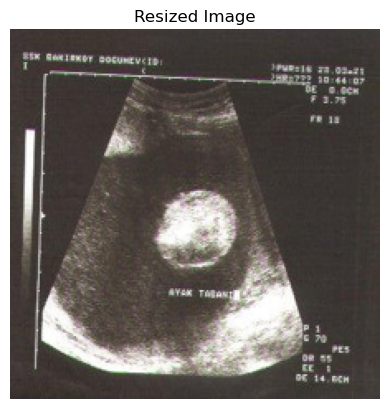

In [78]:

from PIL import Image
import matplotlib.pyplot as plt

# Define the image path (using raw string to handle backslashes)
image_path = r'C:\Users\styap\Downloads\all_data\train\radiology\images\PMC88995_1471-2393-2-1-2.jpg'

# Open the image
image = Image.open(image_path)

# Resize the image
image_resized = image.resize((224, 224))

# Display the resized image with Matplotlib
plt.imshow(image_resized)
plt.axis('off')  # Turn off axis
plt.title("Resized Image")
plt.show()


In [82]:
# Check the Shape of the Resized Image
import numpy as np
from PIL import Image

# Use raw string for file path (or replace backslashes with forward slashes)
image_path = r'C:\Users\styap\Downloads\all_data\train\radiology\images\PMC88995_1471-2393-2-1-2.jpg'

# Open the image
image = Image.open(image_path)

# Resize the image
image_resized = image.resize((224, 224))

# Convert the image to a NumPy array
image_array = np.array(image_resized)

# Print the shape of the resized image
print(image_array.shape)  # Should output (224, 224, 3) for a color image or (224, 224) for grayscale


(224, 224, 3)


In [86]:
import numpy as np
from PIL import Image

# Open and resize the image (use raw string for the path)
image_path = r'C:\Users\styap\Downloads\all_data\train\radiology\images\PMC88995_1471-2393-2-1-2.jpg'
image = Image.open(image_path)
image_resized = image.resize((224, 224))

# Convert the image to a NumPy array
image_array = np.array(image_resized)

# Normalize the pixel values to [0, 1]
image_array_normalized = image_array / 255.0

# Check the min and max values to verify normalization
print("Min value:", image_array_normalized.min())
print("Max value:", image_array_normalized.max())


Min value: 0.11764705882352941
Max value: 1.0


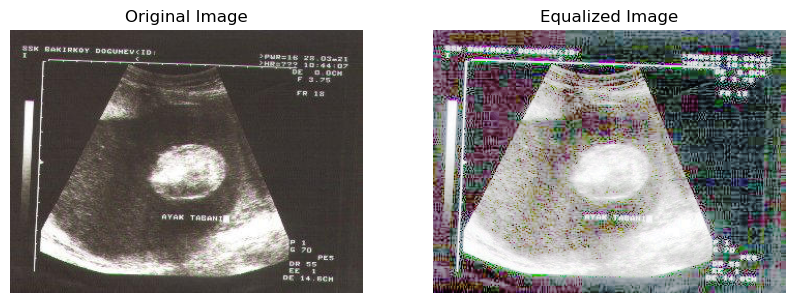

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use raw string for the file path to avoid the escape character issue
image_path = r'C:\Users\styap\Downloads\all_data\train\radiology\images\PMC88995_1471-2393-2-1-2.jpg'

# Read the color image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert the image to RGB (OpenCV reads in BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the image into three channels (R, G, B)
    r, g, b = cv2.split(image_rgb)

    # Apply histogram equalization to each channel
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)

    # Merge the equalized channels back into an image
    equalized_image_rgb = cv2.merge([r_eq, g_eq, b_eq])

    # Display the original and equalized image
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Equalized Image
    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image_rgb)
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()


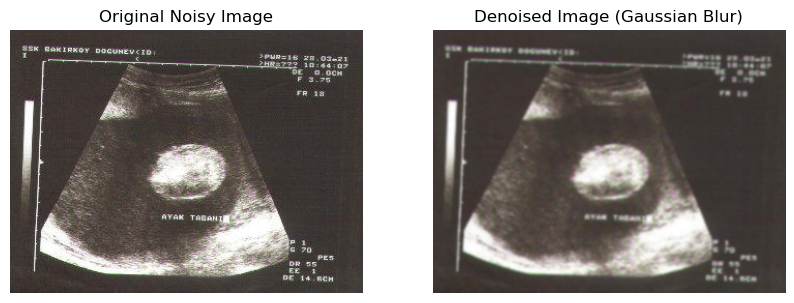

In [94]:
import cv2
import matplotlib.pyplot as plt


image_path = r'C:\Users\styap\Downloads\all_data\train\radiology\images\PMC88995_1471-2393-2-1-2.jpg'

# Read the noisy image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Apply Gaussian Blur (Denoising)
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Display the original and denoised image
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Noisy Image')
    plt.axis('off')

    # Denoised Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    plt.title('Denoised Image (Gaussian Blur)')
    plt.axis('off')

    plt.show()



In [98]:
!pip install keras

!pip install tensorflow



     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------- ----------------------- 20.5/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 272.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.2 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.2 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.2 MB 991.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.2 MB 605.3 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.2 MB 605.3 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.2 MB 654.3 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.2 MB 654.3 kB/s eta 0:00:02
  

Image loaded successfully.
Augmented image generation started...
Augmented Image 1:
Shape: (224, 224, 3), Data type: uint8
Augmented Image 2:
Shape: (224, 224, 3), Data type: uint8


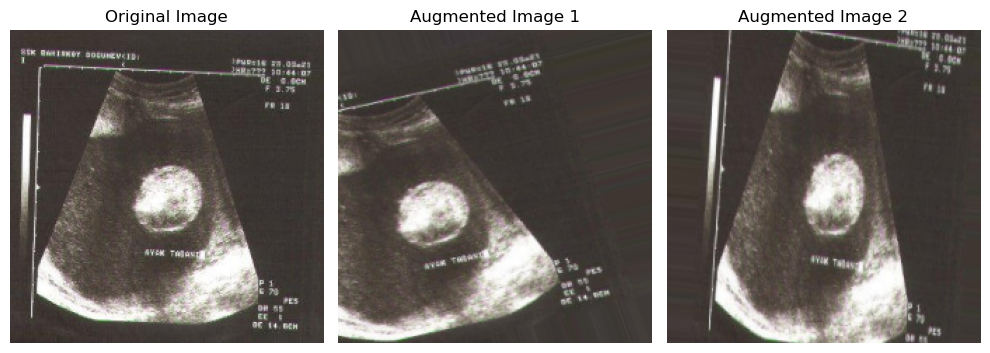

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Use raw string for the file path to avoid the escape character issue
image_path = r'C:\Users\styap\Downloads\all_data\train\radiology\images\PMC88995_1471-2393-2-1-2.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded. Check the file path.")
else:
    print("Image loaded successfully.")

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create an ImageDataGenerator instance with the specified augmentations
    datagen = ImageDataGenerator(
        rotation_range=40,         # Random rotation within 40 degrees
        width_shift_range=0.2,     # Random horizontal shift
        height_shift_range=0.2,    # Random vertical shift
        zoom_range=0.2             # Random zoom
    )

    # Reshape the image to match the expected input format for ImageDataGenerator (batch_size, height, width, channels)
    image_resized = cv2.resize(image_rgb, (224, 224))
    image_array = np.expand_dims(image_resized, axis=0)  # Add batch dimension

    # Create a generator that will augment the image
    augmented_images = datagen.flow(image_array, batch_size=1)

    # Check if augmented images are being generated
    print("Augmented image generation started...")

    # Plot the original and augmented images
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image_resized)
    plt.title('Original Image')
    plt.axis('off')

    # Augmented Images (apply the transformation multiple times to see different effects)
    for i in range(2, 4):  # Display 2 augmented images
        augmented_image = next(augmented_images)[0].astype(np.uint8)  # Get the next augmented image
        print(f"Augmented Image {i-1}:")
        print(f"Shape: {augmented_image.shape}, Data type: {augmented_image.dtype}")  # Debugging output
        plt.subplot(1, 3, i)
        plt.imshow(augmented_image)
        plt.title(f'Augmented Image {i-1}')  # Corrected the string by closing it properly
        plt.axis('off')

    # Tight layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
